<a href="https://colab.research.google.com/github/tripathiosho/PyTorch-Projects/blob/main/House_Prices_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Assignments_Case_Studies/houseprice.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Assignments_Case_Studies/houseprice.csv',usecols=["SalePrice", "MSSubClass", "MSZoning", "LotFrontage", "LotArea","Street", "YearBuilt", "LotShape", "1stFlrSF", "2ndFlrSF"]).dropna()
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000


In [6]:
df.shape

(1201, 10)

In [7]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   object 
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   object 
 5   LotShape     1201 non-null   object 
 6   YearBuilt    1201 non-null   int64  
 7   1stFlrSF     1201 non-null   int64  
 8   2ndFlrSF     1201 non-null   int64  
 9   SalePrice    1201 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 103.2+ KB


In [9]:
for i in df.columns:
  print(i +" Has total -> "+ str(len(df[i].unique()))+ " Unique Values ")

MSSubClass Has total -> 15 Unique Values 
MSZoning Has total -> 5 Unique Values 
LotFrontage Has total -> 110 Unique Values 
LotArea Has total -> 869 Unique Values 
Street Has total -> 2 Unique Values 
LotShape Has total -> 4 Unique Values 
YearBuilt Has total -> 112 Unique Values 
1stFlrSF Has total -> 678 Unique Values 
2ndFlrSF Has total -> 368 Unique Values 
SalePrice Has total -> 597 Unique Values 


In [10]:
import datetime
datetime.datetime.now().year

2024

In [11]:
df['Total Years'] = datetime.datetime.now().year - df["YearBuilt"]

In [12]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500,21
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500,48
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500,23
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000,109
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000,24


In [13]:
df.drop("YearBuilt", axis=1, inplace=True)

In [14]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', '1stFlrSF', '2ndFlrSF', 'SalePrice', 'Total Years'],
      dtype='object')

In [15]:
cat_features = ["MSSubClass","MSZoning","Street","LotShape"]
out_feature = "SalePrice"

In [16]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders = {}
lbl_encoders["MSSubClass"] = LabelEncoder()
lbl_encoders["MSSubClass"].fit_transform(df["MSSubClass"])

array([5, 0, 5, ..., 6, 0, 0])

In [17]:
lbl_encoders

{'MSSubClass': LabelEncoder()}

In [18]:
lbl_encoders = {}
for feature in cat_features:
  lbl_encoders[feature] = LabelEncoder()
  df[feature] = lbl_encoders[feature].fit_transform(df[feature])

In [19]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,5,3,65.0,8450,1,3,856,854,208500,21
1,0,3,80.0,9600,1,3,1262,0,181500,48
2,5,3,68.0,11250,1,0,920,866,223500,23
3,6,3,60.0,9550,1,0,961,756,140000,109
4,5,3,84.0,14260,1,0,1145,1053,250000,24
...,...,...,...,...,...,...,...,...,...,...
1455,5,3,62.0,7917,1,3,953,694,175000,25
1456,0,3,85.0,13175,1,3,2073,0,210000,46
1457,6,3,66.0,9042,1,3,1188,1152,266500,83
1458,0,3,68.0,9717,1,3,1078,0,142125,74


In [20]:
### Stacking and Converting Into Tensors
cat_features=np.stack([df['MSSubClass'],df['MSZoning'],df['Street'],df['LotShape']],1)
cat_features

array([[5, 3, 1, 3],
       [0, 3, 1, 3],
       [5, 3, 1, 0],
       ...,
       [6, 3, 1, 3],
       [0, 3, 1, 3],
       [0, 3, 1, 3]])

In [21]:
### Convert numpy to Tensors
import torch
cat_features=torch.tensor(cat_features,dtype=torch.int64)
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [22]:
#### create continuous variable
cont_features=[]
for i in df.columns:
    if i in ["MSSubClass", "MSZoning", "Street", "LotShape","SalePrice"]:
        pass
    else:
        cont_features.append(i)

In [23]:
cont_features

['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'Total Years']

In [24]:
### Stacking continuous variable to a tensor
cont_values=np.stack([df[i].values for i in cont_features],axis=1)
cont_values=torch.tensor(cont_values,dtype=torch.float)
cont_values

tensor([[   65.,  8450.,   856.,   854.,    21.],
        [   80.,  9600.,  1262.,     0.,    48.],
        [   68., 11250.,   920.,   866.,    23.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    83.],
        [   68.,  9717.,  1078.,     0.,    74.],
        [   75.,  9937.,  1256.,     0.,    59.]])

In [25]:
cont_values.dtype

torch.float32

In [26]:
### Dependent Feature
y=torch.tensor(df['SalePrice'].values,dtype=torch.float).reshape(-1,1)
y

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   int64  
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   int64  
 5   LotShape     1201 non-null   int64  
 6   1stFlrSF     1201 non-null   int64  
 7   2ndFlrSF     1201 non-null   int64  
 8   SalePrice    1201 non-null   int64  
 9   Total Years  1201 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 103.2 KB


In [28]:
cat_features.shape,cont_values.shape,y.shape

(torch.Size([1201, 4]), torch.Size([1201, 5]), torch.Size([1201, 1]))

In [29]:
len(df['MSSubClass'].unique())

15

In [30]:
#### Embedding Size For Categorical columns
cat_dims=[len(df[col].unique()) for col in ["MSSubClass", "MSZoning", "Street", "LotShape"]]

In [31]:
cat_dims

[15, 5, 2, 4]

In [32]:
embedding_dim= [(x, min(50, (x + 1) // 2)) for x in cat_dims]

In [33]:
embedding_dim

[(15, 8), (5, 3), (2, 1), (4, 2)]

In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F
embed_representation=nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
embed_representation

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [35]:

cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [36]:
cat_featuresz=cat_features[:4]
cat_featuresz

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        [6, 3, 1, 0]])

In [37]:
pd.set_option('display.max_rows', 500)
embedding_val=[]
for i,e in enumerate(embed_representation):
    embedding_val.append(e(cat_features[:,i]))

In [38]:
embedding_val

[tensor([[ 1.0603, -0.8321,  0.0914,  ...,  0.7538,  0.2835,  0.3607],
         [ 1.0432,  0.5590, -0.4997,  ...,  1.1582, -1.5695,  0.6472],
         [ 1.0603, -0.8321,  0.0914,  ...,  0.7538,  0.2835,  0.3607],
         ...,
         [ 0.1682,  0.9819,  0.7969,  ...,  0.1975, -0.2232,  0.6297],
         [ 1.0432,  0.5590, -0.4997,  ...,  1.1582, -1.5695,  0.6472],
         [ 1.0432,  0.5590, -0.4997,  ...,  1.1582, -1.5695,  0.6472]],
        grad_fn=<EmbeddingBackward0>),
 tensor([[-0.0797, -0.3887, -1.2958],
         [-0.0797, -0.3887, -1.2958],
         [-0.0797, -0.3887, -1.2958],
         ...,
         [-0.0797, -0.3887, -1.2958],
         [-0.0797, -0.3887, -1.2958],
         [-0.0797, -0.3887, -1.2958]], grad_fn=<EmbeddingBackward0>),
 tensor([[1.9731],
         [1.9731],
         [1.9731],
         ...,
         [1.9731],
         [1.9731],
         [1.9731]], grad_fn=<EmbeddingBackward0>),
 tensor([[0.0592, 1.1987],
         [0.0592, 1.1987],
         [0.7892, 4.1109],
     

In [39]:
z = torch.cat(embedding_val, 1)
z

tensor([[ 1.0603, -0.8321,  0.0914,  ...,  1.9731,  0.0592,  1.1987],
        [ 1.0432,  0.5590, -0.4997,  ...,  1.9731,  0.0592,  1.1987],
        [ 1.0603, -0.8321,  0.0914,  ...,  1.9731,  0.7892,  4.1109],
        ...,
        [ 0.1682,  0.9819,  0.7969,  ...,  1.9731,  0.0592,  1.1987],
        [ 1.0432,  0.5590, -0.4997,  ...,  1.9731,  0.0592,  1.1987],
        [ 1.0432,  0.5590, -0.4997,  ...,  1.9731,  0.0592,  1.1987]],
       grad_fn=<CatBackward0>)

In [40]:
#### Implement dropupout
droput=nn.Dropout(.4)

In [41]:
final_embed=droput(z)
final_embed

tensor([[ 0.0000, -1.3869,  0.0000,  ...,  3.2886,  0.0986,  1.9979],
        [ 1.7387,  0.9317, -0.8329,  ...,  3.2886,  0.0986,  1.9979],
        [ 1.7671, -0.0000,  0.0000,  ...,  3.2886,  1.3153,  0.0000],
        ...,
        [ 0.2804,  1.6365,  1.3281,  ...,  0.0000,  0.0986,  0.0000],
        [ 1.7387,  0.9317, -0.0000,  ...,  3.2886,  0.0986,  0.0000],
        [ 0.0000,  0.9317, -0.8329,  ...,  3.2886,  0.0986,  1.9979]],
       grad_fn=<MulBackward0>)

In [42]:
##### Create a Feed Forward Neural Network
import torch
import torch.nn as nn
import torch.nn.functional as F
class FeedForwardNN(nn.Module):

    def __init__(self, embedding_dim, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)

        layerlist = []
        n_emb = sum((out for inp,out in embedding_dim))
        n_in = n_emb + n_cont

        for i in layers:
            layerlist.append(nn.Linear(n_in,i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))

        self.layers = nn.Sequential(*layerlist)

    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)

        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [43]:
len(cont_features)

5

In [44]:
torch.manual_seed(100)
model=FeedForwardNN(embedding_dim,len(cont_features),1,[100,50],p=0.4)

In [45]:
model

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

In [46]:
loss_function=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [47]:
df.shape

(1201, 10)

In [48]:
cont_values

tensor([[   65.,  8450.,   856.,   854.,    21.],
        [   80.,  9600.,  1262.,     0.,    48.],
        [   68., 11250.,   920.,   866.,    23.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    83.],
        [   68.,  9717.,  1078.,     0.,    74.],
        [   75.,  9937.,  1256.,     0.,    59.]])

In [49]:
cont_values.shape

torch.Size([1201, 5])

In [50]:
batch_size=1200
test_size=int(batch_size*0.15)
train_categorical=cat_features[:batch_size-test_size]
test_categorical=cat_features[batch_size-test_size:batch_size]
train_cont=cont_values[:batch_size-test_size]
test_cont=cont_values[batch_size-test_size:batch_size]
y_train=y[:batch_size-test_size]
y_test=y[batch_size-test_size:batch_size]

In [51]:
len(train_categorical),len(test_categorical),len(train_cont),len(test_cont),len(y_train),len(y_test)

(1020, 180, 1020, 180, 1020, 180)

In [52]:
epochs=5000
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model(train_categorical,train_cont)
    loss=torch.sqrt(loss_function(y_pred,y_train)) ### RMSE
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 200496.75
Epoch number: 11 and the loss : 200493.46875
Epoch number: 21 and the loss : 200489.140625
Epoch number: 31 and the loss : 200482.640625
Epoch number: 41 and the loss : 200473.25
Epoch number: 51 and the loss : 200461.375
Epoch number: 61 and the loss : 200446.4375
Epoch number: 71 and the loss : 200429.421875
Epoch number: 81 and the loss : 200407.953125
Epoch number: 91 and the loss : 200383.421875
Epoch number: 101 and the loss : 200355.234375
Epoch number: 111 and the loss : 200322.0625
Epoch number: 121 and the loss : 200291.484375
Epoch number: 131 and the loss : 200252.109375
Epoch number: 141 and the loss : 200206.5625
Epoch number: 151 and the loss : 200162.234375
Epoch number: 161 and the loss : 200112.40625
Epoch number: 171 and the loss : 200059.5
Epoch number: 181 and the loss : 200006.1875
Epoch number: 191 and the loss : 199946.578125
Epoch number: 201 and the loss : 199882.578125
Epoch number: 211 and the loss : 199815.90625
Epoc

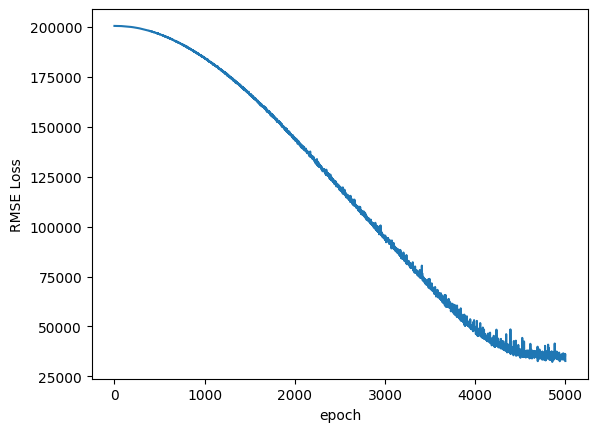

In [55]:
# Detach and convert each tensor in the list to a NumPy array
final_losses_np = [loss.detach().numpy() for loss in final_losses]

# Plot the loss curve
plt.plot(range(epochs), final_losses_np)
plt.ylabel('RMSE Loss')
plt.xlabel('epoch')
plt.show()


In [56]:
#### Validate the Test Data
y_pred=""
with torch.no_grad():
    y_pred=model(test_categorical,test_cont)
    loss=torch.sqrt(loss_function(y_pred,y_test))
print('RMSE: {}'.format(loss))

RMSE: 43376.609375


In [57]:
data_verify=pd.DataFrame(y_test.tolist(),columns=["Test"])

In [58]:
data_predicted=pd.DataFrame(y_pred.tolist(),columns=["Prediction"])

In [59]:
data_predicted

,Prediction
0,128257.156250
1,203703.125000
2,170906.625000
3,233781.156250
4,215435.093750
5,202057.109375
6,151808.296875
7,296184.593750
8,156915.437500
9,367561.843750


In [60]:
final_output=pd.concat([data_verify,data_predicted],axis=1)
final_output['Difference']=final_output['Test']-final_output['Prediction']
final_output.head()

,Test,Prediction,Difference
0,130000.0,128257.15625,1742.84375
1,138887.0,203703.12500,-64816.12500
2,175500.0,170906.62500,4593.37500
3,195000.0,233781.15625,-38781.15625
4,142500.0,215435.09375,-72935.09375


In [61]:
#### Saving The Model
#### Save the model
torch.save(model,'HousePrice.pt')

In [62]:
torch.save(model.state_dict(),'HouseWeights.pt')

In [63]:
### Loading the saved Model
embs_size=[(15, 8), (5, 3), (2, 1), (4, 2)]
model1=FeedForwardNN(embs_size,5,1,[100,50],p=0.4)

In [64]:
model1.load_state_dict(torch.load('HouseWeights.pt'))

<All keys matched successfully>

In [65]:
model1.eval()

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)